![Images](Images/ITAcademy.png)
# CIÈNCIA DE DADES: M07.T01
#### Created by: Dani Planas Montserrat


In [226]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import statistics
#Import library MySql
import mysql.connector

#Import Library Preprocessing and modeling
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Import Library
from ip2geotools.databases.noncommercial import DbIpCity


warnings.filterwarnings('ignore')


In [227]:
#************************************************************************************
#***************************     READ Files Functions      **************************
#************************************************************************************
#Function for Read *.csv file (Import Data)
def openFileTXT(path_name):
    
    # Read *.csv file (Import Data)
    df = pd.read_csv(path_name, sep='::', names=movie_column_l, encoding = 'ISO-8859-1', index_col=0, engine='python')

    return df

#Function for Read *.txt file (Import Data)
def openFileTable(path_name, file_name, separator, movie_column_l):

    # Read *.txt file (Import Data)
    df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    
    return df

#Function for Read *.parquet file (Import Data)
def openFileParquet(path_name, file_name):
    
    #Import library pyarrow for read files with extenison "parquet" 
    import pyarrow 
    # Read *.txt file (Import Data)
    #df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    df = pd.read_parquet(path_name + file_name, engine='pyarrow')
    
    return df




In [228]:
#************************************************************************************
#******************************      PLOT Functions     *****************************
#************************************************************************************
#Function plot, type Histogram (one categoric value)
def plotHistogram(df):
    
    # create a dataset
    height = df
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['green'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Histogram (one Numeric value)
def plotHistogram2(df,paramNum):
    
    # create a dataset
    height = df[paramNum]
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['yellow'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

def plotDensityPlot(df):
    # library & dataset
    import seaborn as sns
    
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")

    # plotting both distibutions on the same figure
    fig = sns.kdeplot(df, shade=True, color="r")
    #fig = sns.kdeplot(df[paramNum2], shade=True, color="b")

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type ScatterPlot
def plotSnsScatterplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type LinePlot
def plotSnsLineplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.lineplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type HistPlot
def plotSnsHistplot(df, paramNum1, title, ylabel, xlabel, binsNum):
  
    sns.histplot(data=df, x=paramNum1, bins=binsNum, kde=True)
    #g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Stacked Area Chart (with 3 numeric values and 1 categoric value)   
def plotBarplotMultiple(df, paramNum1, paramNum2, paramNum3, Sel3):
        # libraries
        import numpy as np
        import matplotlib.pyplot as plt

        # width of the bars
        barWidth = 0.3
        
        # Choose the height of the blue bars
        bars1 = df

        if (Sel3 == 2):
            # Choose the height of the cyan bars
            bars2 = df[paramNum2] 

        if (Sel3 == 3):
            # Choose the height of the cyan bars
            bars3 = df[paramNum3] 
        
        # Choose the height of the error bars (bars1)
        yer1 = np.arange(len(bars1))

        # Choose the height of the error bars (bars2)
        yer2 = np.arange(len(bars1))
        
        #print(title) by groups of bars
        title = df.index 
        
        # The x position of bars
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]

        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer1, capsize=5, label=paramNum1)
        
        if (Sel3 == 2):
            # Create cyan bars
            plt.bar(r2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum2)

        if (Sel3 == 3):
             # Create cyan bars
             plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum3)
   
        # general layout
        plt.xticks([r + barWidth for r in range(len(bars1))], title)
        plt.ylabel('height')
        #plt.legend()

        # Show graphic
        fig = plt.gcf()
        plt.show()

        return fig

#Function plot, show a World Map with Geolocation points from a dataset
def plotWorldMapGeolocPoints(df, pLatitud, pLongitud):

        bars3 = df[pLatitud] 

        #Dibujar mapas
        from mpl_toolkits.basemap.test import Basemap
        import matplotlib.pyplot as plt


        #Figure Size
        plt.figure(figsize=(16,12))

        #Projection Type : robin, ortho ...
        my_map=Basemap(projection='robin',lon_0=0,lat_0=0)  #'robin' ,'ortho'

        #Draw cost lines and countries
        my_map.drawcoastlines()
        my_map.drawcountries()

        #Define colours
        my_map.drawcountries(color='#303338')
        my_map.drawmapboundary(fill_color='#c0eaff')
        my_map.drawcoastlines(color='#324c87')
        my_map.fillcontinents(color='#ebe7d5', lake_color='#c0eaff')


        #Place the different locations on the map
        for i in range(len(df[pLongitud])):     
            x,y = my_map(df[pLongitud][i], df[pLatitud][i])
            my_map.plot(x,y, color='g', marker = 'o' , markersize=10 , alpha = 0.9)

        return my_map
    

In [229]:
#************************************************************************************
#***************************     GEOLOCATION Functions     **************************
#************************************************************************************

/#Function that give us information on the location of an IP adress (Country, latitude, altitude,..)
def getInfoGeolocation(x, num):
    

    
    response = DbIpCity.get(x, api_key='free')
    
    #(1) Return Name of country
    if num==1:
        exit = response.country
    #(2) Return Name of country
    if num==2:
        exit = response.latitude
    #(3) Return Name of country
    if num==3:
        exit = response.longitude
   
    #ip = str(dfLogWeb['IP'][1])
    #response = DbIpCity.get(ip, api_key='free')
    #response.ip_address
    #print(response.city)
    #print(response.region)
    #print(response.country)

    #print(response.latitude)
    #print(response.longitude)
    #print(response.to_json())
    return exit



In [230]:
#************************************************************************************
#***************************        SAMPLE Functions       **************************
#************************************************************************************
#Function for doing a Simple Random Sampling from a dataset
def simpleSampling(df, num_sample):
    
    dfSample = df.sample(num_sample)          # Select X sample points from dataset
    return dfSample                           # Return result

# Function for doing a Systematic Sampling from dataset
def systematicSampling(df, start, step):
 
    indexes = np.arange(start, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

# Function for doing a Stratified Sampling from dataset (able for 3 subgroups)
def stratifiedSampling3Group(df, group, subgName1, subgName2, subgName3, samplePercentage):
 
    # STEP1: Divide de Group in subgroups (STRATA)
    group1_df = df.groupby(group)
    group1_df = group1_df.get_group(subgName1)
    nReg_group1 = len(group1_df)
#   print('Regsitros Grupo 1:', nReg_group1)
#   display(group1_df)

    group2_df = df.groupby(group)
    group2_df = group2_df.get_group(subgName2)
    nReg_group2 = len(group2_df)
#   print('Regsitros Grupo 2:', nReg_group2)
#   display(group2_df)

    group3_df = df.groupby(group)
    group3_df = group3_df.get_group(subgName3)
    nReg_group3 = len(group3_df)
#   print('Regsitros Grupo 3:', nReg_group3)
#   display(group3_df)
    
    # STEP 2: get a percentage from each group
    group11_df = group1_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group12_df = group2_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group13_df = group3_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))

    # STEP 3: 
    dfNew = pd.concat([group11_df, group12_df])
    dfNew = pd.concat([dfNew, group13_df])

    return dfNew

# Function for doing a Systematic Sampling from dataset
def reservoirSampling(df, k):
          
    #Import library
    import random
    
    # Create as stream generator
    #stream = dfRunners20['athlete']
    stream = df.index
    # Doing Reservoir Sampling from the stream
    #k=6
    reservoir = []
    for i, element in enumerate(stream):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element

    print(reservoir)
    print(len(reservoir))

    #Define new dataframe
    df_Sample = pd.DataFrame()

    #Create a New dataframe with values selected from reservoir sampling
    for i in range(len(reservoir)):
        num = reservoir[i]
        df_Sample = df_Sample.append(df.loc[num],ignore_index=True)
        
    return df_Sample

In [231]:
#************************************************************************************
#********************       LINEAR REGRESSION Functions          ********************
#************************************************************************************

In [232]:
##########################################################################
##                 DATA SCIENCE: M07.T01: Exercici 1                    ##
##########################################################################
# Exercici 1: Crea almenys dos models de classificació diferents per 
# intentar predir el millor les classes de l'arxiu adjunt.

path_name = "Data sets\\M07\\"                                        # Define Path name
file_name = "wineData.txt"                                            # Define File name
separator = ','                                                       # Define type of char between columns  
movie_column_l = [ 'Class', 'Alcohol', 'MA', 'Ash', 'AoA', 'Magnesium', 
                  'TPhenols', 'Flavanoids', 'NonPhenols', 'Proanthocyanins',
                  'Color', 'Hue', 'OD', 'Proline']                                             # Define name of columns

df = openFileTable(path_name, file_name, separator, movie_column_l)   # Function to open File


print ("Taula d'Anaàlisis CQuímics de Vins: ")                               # Print Message
display(df)                                                                  # Display datset imported

print ("Llegenda:")
print ("    EL datset conté el resultat de l'anàlisis químic d'uns vins provinents d'una mateixa") 
print ("    regió d'Itàlia, però cultivat per 3 diferents productors.")
print ("    ")
print ("    0. CLASSE:    hi ha 3 Classes; Classe 1: 59, Classe 2: 71, Classe 3: 48")
print ("    1. Alcohol:                                      ")
print ("    2. MA:                                 Malic acid")
print ("    3. Ash:                                       Ash")
print ("    4. AoA:                         Alcalinity of ash")
print ("    5. Magnesium:                           Magnesium")
print ("    6. TPhenols:                        Total phenols")
print ("    7. Flavanoids:                         Flavanoids")
print ("    8. NonPhenols:               Nonflavanoid phenols")
print ("    9. Proanthocyanins:               Proanthocyanins")
print ("   10. Color:                         Color intensity")
print ("   11. Hue:                                       Hue")
print ("   12. OD:               OD280/OD315 of diluted wines")
print ("   13. Proline:                               Proline")



Taula d'Anaàlisis CQuímics de Vins: 


,Class,Alcohol,MA,Ash,AoA,Magnesium,TPhenols,Flavanoids,NonPhenols,Proanthocyanins,Color,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Llegenda:
    EL datset conté el resultat de l'anàlisis químic d'uns vins provinents d'una mateixa
    regió d'Itàlia, però cultivat per 3 diferents productors.
    
    0. CLASSE:    hi ha 3 Classes; Classe 1: 59, Classe 2: 71, Classe 3: 48
    1. Alcohol:                                      
    2. MA:                                 Malic acid
    3. Ash:                                       Ash
    4. AoA:                         Alcalinity of ash
    5. Magnesium:                           Magnesium
    6. TPhenols:                        Total phenols
    7. Flavanoids:                         Flavanoids
    8. NonPhenols:               Nonflavanoid phenols
    9. Proanthocyanins:               Proanthocyanins
   10. Color:                         Color intensity
   11. Hue:                                       Hue
   12. OD:               OD280/OD315 of diluted wines
   13. Proline:                               Proline


In [233]:
# Show the information from the Table Values
display(df.describe())

#Show the correlation between all values
corr_matrix=df.corr()
display(corr_matrix)

,Class,Alcohol,MA,Ash,AoA,Magnesium,TPhenols,Flavanoids,NonPhenols,Proanthocyanins,Color,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


,Class,Alcohol,MA,Ash,AoA,Magnesium,TPhenols,Flavanoids,NonPhenols,Proanthocyanins,Color,Hue,OD,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
MA,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
AoA,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
TPhenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
NonPhenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [234]:
#************************************************************************************
#***************************     Correlation Functions     **************************
#************************************************************************************
#Function for convert a correlation matrix in "tidy" format
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

# Call Function for select what value has more correlation with "MEDV" value
tidy_corr_matrix(corr_matrix).head(30)

,var_1,var_2,r,abs_r
91,TPhenols,Flavanoids,0.864564,0.864564
104,Flavanoids,TPhenols,0.864564,0.864564
98,Flavanoids,Class,-0.847498,0.847498
7,Class,Flavanoids,-0.847498,0.847498
12,Class,OD,-0.788230,0.788230
168,OD,Class,-0.788230,0.788230
110,Flavanoids,OD,0.787194,0.787194
175,OD,Flavanoids,0.787194,0.787194
84,TPhenols,Class,-0.719163,0.719163
6,Class,TPhenols,-0.719163,0.719163


In [235]:
##########################################################################
##                   CLASSIFICATION: DECISION TREE                      ##
##########################################################################

In [236]:
# Function that Split data in train and test:

def split_TrainTest(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    #Split the data into Train(70%) and Test(30%)
    X = df[Xparam]
    y = df[Yparam]

    # Split data in Train () & Test
    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            test_size=0.3,
                                            random_state = 1)

    # Create the Model with Train & Test
    model = sm.OLS(endog=y_train, exog=X_train,)
    model = model.fit()
    print(model.summary())
    return model, X_train, X_test, y_train, y_test 

#Function that Split data in Train and Test, create a Model
Xcols = ['Alcohol', 'MA', 'Ash', 'AoA', 'Magnesium', 
                  'TPhenols', 'Flavanoids', 'NonPhenols', 'Proanthocyanins',
                  'Color', 'Hue', 'OD', 'Proline']
model, X0_train, X0_test, y0_train, y0_test  = split_TrainTest(df, Xcols, "Class")

                                 OLS Regression Results                                
Dep. Variable:                  Class   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              437.7
Date:                Tue, 20 Sep 2022   Prob (F-statistic):                    7.32e-89
Time:                        07:54:12   Log-Likelihood:                         -25.013
No. Observations:                 124   AIC:                                      76.03
Df Residuals:                     111   BIC:                                      112.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [237]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier      # Import Decision Tree Classifier
from sklearn import tree                             # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics                          # Import scikit-learn metrics module for accuracy calculation


# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X0_train,y0_train)

# Predict the response for test dataset
y0_pred = clf.predict(X0_test)

# Show the prediction
display(y0_pred)

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1], dtype=int64)

In [238]:
# Model Accuracy, how often is the classifier correct?
accuracy_TreeCalsification = metrics.accuracy_score(y0_test, y0_pred)
print("Precisió Arbre de Classificació (Accuracy):", accuracy_TreeCalsification)

Precisió Arbre de Classificació (Accuracy): 0.9444444444444444


              precision    recall  f1-score   support

           1       0.96      0.96      0.96        23
           2       0.94      0.89      0.92        19
           3       0.92      1.00      0.96        12

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54



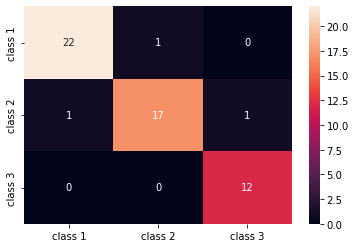

In [239]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm_TREE = pd.DataFrame(confusion_matrix(y0_test, y0_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm_TREE, annot=True, fmt='d');

# Print Result from classsification Tree
tree_classificaction_report = classification_report(y0_test, y0_pred)
print(tree_classificaction_report)

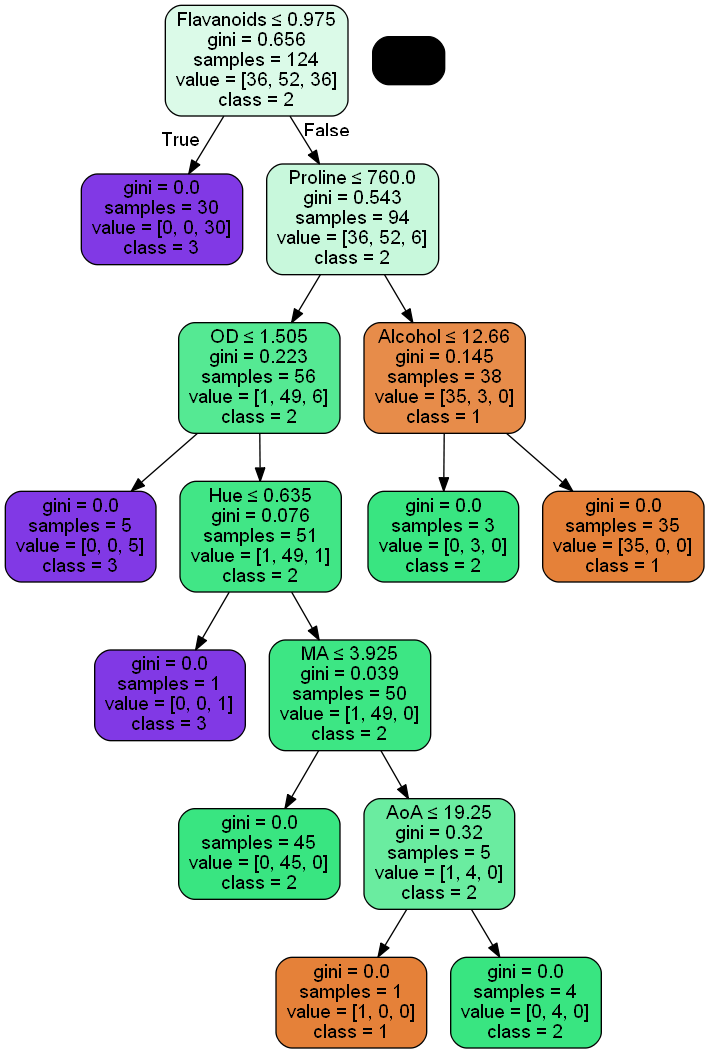

In [240]:
from sklearn.tree import export_graphviz
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xcols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

#Save graph in a files with format ".pdf" and ".png"
graph.write_png('wines.png')
graph.write_pdf('wines.pdf')
Image(graph.create_png())


<span style=color:green><b>ALGORITMES DE CLASSSIFICACIÓ: ARBRE DE CLASSIFICACIÓ</u></b></span> 

Com podem observar en la figura anterior hem generat un ARBRE DE CLASSSIFICACIÓ utilitzant la llibreria Sckikit-learn. Hem dividit les columnes en variables Dependents i Variables Independents (clase).

La precissió que hem obtingut de l'arbre de Clasificació és de:

      ACCURANCY =  0.9629629629629629
 


In [241]:
##########################################################################
##             CLASSIFICATION: KNN (K nearest neighbours)               ##
##########################################################################

In [242]:
# Function that Split data in train and test:

def split_TrainTest_KNN(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    from sklearn.neighbors import KNeighborsClassifier
    
    #Split the data into Train(70%) and Test(30%)
    X = df[Xparam]
    y = df[Yparam]

    # Split data in Train () & Test
    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            test_size=0.3,
                                            random_state = 1)

    # Create the Model with Train & Test
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Classifier
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    
    #print(model.summary())
    return classifier, X_train, X_test, y_train, y_test 


#Function that Split data in Train and Test, create a Model
Xcols = ['Alcohol', 'MA', 'Ash', 'AoA', 'Magnesium', 
                  'TPhenols', 'Flavanoids', 'NonPhenols', 'Proanthocyanins',
                  'Color', 'Hue', 'OD', 'Proline']
classifier, X1_train, X1_test, y1_train, y1_test  = split_TrainTest_KNN(df, Xcols, "Class")

In [243]:
y1_pred = classifier.predict(X1_test)
display(y1_pred)

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1], dtype=int64)

In [244]:
# Model Accuracy, how often is the classifier correct?
accuracy_KNNCalsification = classifier.score(X1_test, y1_test)
print("Precisió KNN (Accuracy):", accuracy_KNNCalsification)

Precisió KNN (Accuracy): 0.9814814814814815


              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



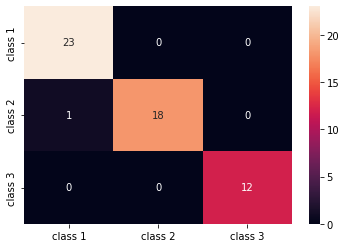

In [245]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm_KNN = pd.DataFrame(confusion_matrix(y1_test, y1_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm_KNN, annot=True, fmt='d');

# Print Result from classsification Tree
KNN_classificaction_report = classification_report(y1_test, y1_pred)
print(KNN_classificaction_report)

<span style=color:green><b>ALGORITMES DE CLASSSIFICACIÓ: KNN (K nearest neighbours)</u></b></span> 

Els resultats anteriors ens mostren que KNN ha pogut classificar la totalitzat de registres 54 (que són el 30% del total de 178 registres) que pertanyen al conjunt de TRAIN amb una precissió del 98%. 

La precissió que hem obtingut de l'algoritme de Clasificació KNN és de:

      ACCURANCY =  0.9814814814814815
 


In [246]:
##########################################################################
##                 DATA SCIENCE: M07.T01: Exercici 2                    ##
##########################################################################
# Exercici 2: Compara els models de classificació utilitzant la precisió 
# (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [247]:
# Print the accurancy Calculated before from two different Classsification 
print("Precisió Arbre de Classificació (Accuracy):", accuracy_TreeCalsification)
print("Precisió KNN (Accuracy):", accuracy_KNNCalsification)

Precisió Arbre de Classificació (Accuracy): 0.9444444444444444
Precisió KNN (Accuracy): 0.9814814814814815


              precision    recall  f1-score   support

           1       0.96      0.96      0.96        23
           2       0.94      0.89      0.92        19
           3       0.92      1.00      0.96        12

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54



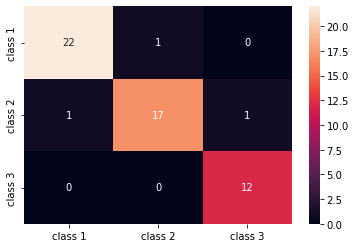

In [248]:
# Print Result from TREE classsification (Calculated before)
sns.heatmap(cm_TREE, annot=True, fmt='d');
print(tree_classificaction_report)


              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



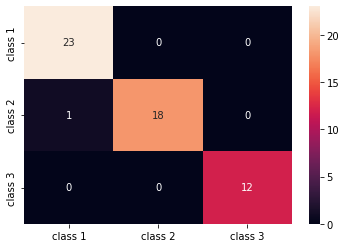

In [249]:
# Print Result from KNN classsification (Calculated before)
sns.heatmap(cm_KNN, annot=True, fmt='d');
print(KNN_classificaction_report)

In [250]:
##########################################################################
##                 DATA SCIENCE: M07.T01: Exercici 3                    ##
##########################################################################
# Exercici 3: Entrena’ls usant els diferents paràmetres que admeten per 
# tal de millorar-ne la predicció..

In [251]:
##########################################################################
##                   CLASSIFICATION: DECISION TREE                      ##
##########################################################################

In [252]:
# Parameters from DecisionTreeClassifier
#    Criterion: This parameter allows us to use the different-different attribute selection measure
#    Splitter:  This parameter allows us to choose the split strategy
#    max_depth: The maximum depth of the tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X0_train,y0_train)

#Predict the response for test dataset
y_pred = clf.predict(X0_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y0_test, y0_pred))

Accuracy: 0.9444444444444444


<span style=color:green><b>ALGORITMES DE CLASSSIFICACIÓ: ARBRE DE CLASSIFICACIÓ</u></b></span> 

Per millorar la predicció de l'arbre de classificació hem utilitzat els paràmetres "criterion", splitter i "max_depth", però tot hi així no hem aconseguit millorar el valor "accurancy" que tenim actualment de 0.96296.



In [253]:
##########################################################################
##             CLASSIFICATION: KNN (K nearest neighbours)               ##
##########################################################################

In [254]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    pred_i = knn.predict(X1_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

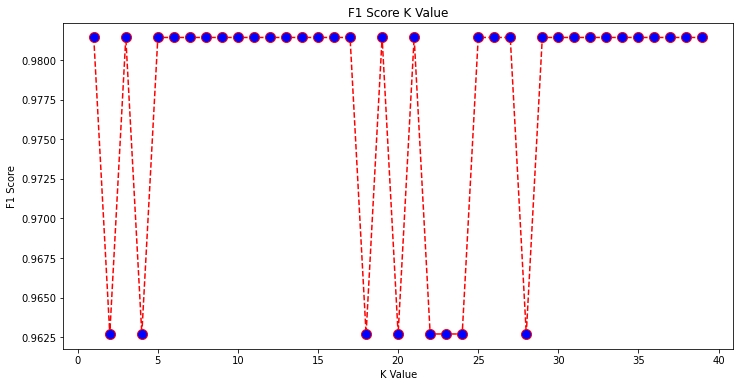

In [255]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [256]:
classifier15 = KNeighborsClassifier(n_neighbors=5)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [257]:
classifier15 = KNeighborsClassifier(n_neighbors=10)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [258]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



<span style=color:green><b>ALGORITMES DE CLASSSIFICACIÓ: KNN CLASSIFICACIÓ</u></b></span> 

Per millorar la predicció de la classificació KNN hem entrenat el nostre classificador KNN amb només 5 veïns, 10 i 15, però tot hi així no hem aconseguit millorar el valor "accurancy" que tenim actualment de 0.98 i no hem obtingut cap diferència notable.



In [259]:
##########################################################################
##                 DATA SCIENCE: M07.T01: Exercici 4                    ##
##########################################################################
# Exercici 4: Compara el seu rendiment fent servir l’aproximació traint/test 
# o cross-validation.

In [260]:
##########################################################################
##                   CLASSIFICATION: DECISION TREE                      ##
##########################################################################
#import libraries
from sklearn.model_selection import cross_val_score

#Calculate the cross-validated metrics
scores = cross_val_score(clf,  X0_train, y0_train, cv=5)
# Print result from cross validation test with 5 times
print(scores)
print(scores.mean())

[0.84       0.88       0.8        0.96       0.95833333]
0.8876666666666667


In [261]:
##########################################################################
##             CLASSIFICATION: KNN (K nearest neighbours)               ##
##########################################################################
#import libraries
from sklearn.model_selection import cross_val_score

#Calculate the cross-validated metrics
scores = cross_val_score(classifier,  X1_train, y1_train, cv=5)
# Print result from cross validation test with 5 times
print(scores)
print(scores.mean())

[0.88       0.96       0.96       1.         0.95833333]
0.9516666666666665


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

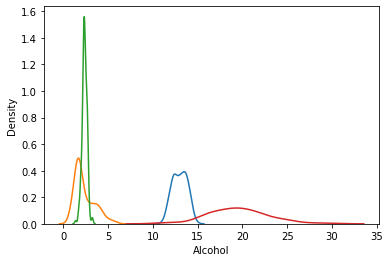

In [298]:
##########################################################################
##                 DATA SCIENCE: M07.T01: Exercici 5                    ##
##########################################################################
# Exercici 5: Aplica algun procés d'enginyeria per millorar els resultats 
# (normalització, estandardització, mostreig...)

#Import libraries
from sklearn import preprocessing
import pandas as pd

XcolsNew = ['Class', 'Alcohol', 'MA', 'Ash', 'AoA', 'Magnesium', 
                  'TPhenols', 'Flavanoids', 'NonPhenols', 'Proanthocyanins',
                  'Color', 'Hue', 'OD', 'Proline']

# Print a graphic with some values
sns.kdeplot(df['Alcohol'])
sns.kdeplot(df['MA'])
sns.kdeplot(df['Ash'])
sns.kdeplot(df['AoA'])



In [300]:
#MinMax Scale: diference between Max and Min.
scaler1 = preprocessing.MinMaxScaler()
dfScaled1 = scaler1.fit_transform(df)

# Create a dataframe with function Mix and Max Sclaer
dfFinal1 = pd.DataFrame(dfScaled1, columns = df.columns)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

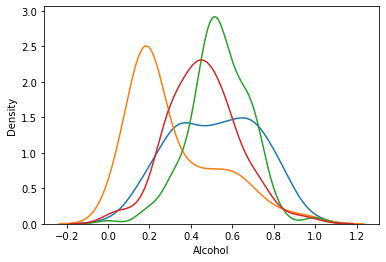

In [301]:
sns.kdeplot(dfFinal1['Alcohol'])
sns.kdeplot(dfFinal1['MA'])
sns.kdeplot(dfFinal1['Ash'])
sns.kdeplot(dfFinal1['AoA'])



In [302]:
dfFinal1.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,0.469101,0.387517,0.0,0.000000,0.500000,1.000000,1.0
Alcohol,178.0,0.518584,0.213639,0.0,0.350658,0.531579,0.696711,1.0
MA,178.0,0.315484,0.220780,0.0,0.170455,0.222332,0.462945,1.0
Ash,178.0,0.538244,0.146708,0.0,0.454545,0.534759,0.640374,1.0
AoA,178.0,0.458502,0.172142,0.0,0.340206,0.458763,0.561856,1.0
Magnesium,178.0,0.323278,0.155244,0.0,0.195652,0.304348,0.402174,1.0
TPhenols,178.0,0.453487,0.215811,0.0,0.262931,0.474138,0.627586,1.0
Flavanoids,178.0,0.356386,0.210730,0.0,0.182489,0.378692,0.534810,1.0
NonPhenols,178.0,0.437460,0.234818,0.0,0.264151,0.396226,0.580189,1.0
Proanthocyanins,178.0,0.372523,0.180555,0.0,0.264984,0.361199,0.485804,1.0


In [303]:
# Standarization with RobustSclaer
scaler2 = preprocessing.RobustScaler()
dfScaled2 = scaler2.fit_transform(df)

# Create a dataframe with function Mix and Max Sclaer
dfFinal2 = pd.DataFrame(dfScaled2, columns = df.columns)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

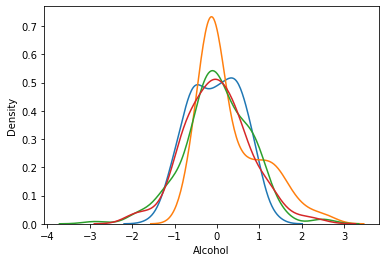

In [304]:
sns.kdeplot(dfFinal2['Alcohol'])
sns.kdeplot(dfFinal2['MA'])
sns.kdeplot(dfFinal2['Ash'])
sns.kdeplot(dfFinal2['AoA'])


In [305]:
# Standarization with StandardSclaer
scaler3 = preprocessing.StandardScaler()
dfScaled3 = scaler3.fit_transform(df)

# Create a dataframe with function Mix and Max Sclaer
dfFinal3 = pd.DataFrame(dfScaled3, columns = df.columns)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

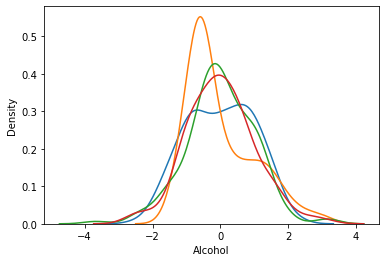

In [306]:
sns.kdeplot(dfFinal3['Alcohol'])
sns.kdeplot(dfFinal3['MA'])
sns.kdeplot(dfFinal3['Ash'])
sns.kdeplot(dfFinal3['AoA'])


In [288]:
# Standarization with Normalizer
scaler4 = preprocessing.Normalizer()
dfScaled4 = scaler4.fit_transform(df)

# Create a dataframe with function Mix and Max Sclaer
dfFinal4 = pd.DataFrame(dfScaled4, columns = df.columns)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

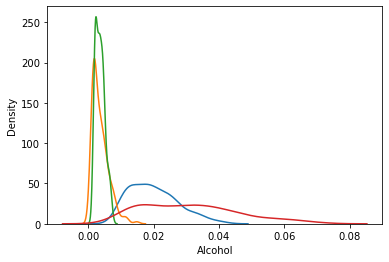

In [289]:
sns.kdeplot(dfFinal4['Alcohol'])
sns.kdeplot(dfFinal4['MA'])
sns.kdeplot(dfFinal4['Ash'])
sns.kdeplot(dfFinal4['AoA'])


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

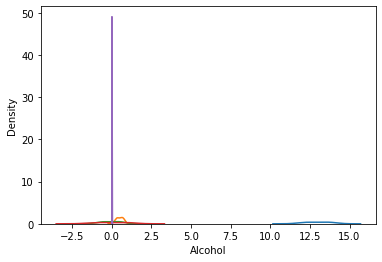

In [290]:
sns.kdeplot(df['Alcohol'])
sns.kdeplot(dfFinal1['Alcohol'])
sns.kdeplot(dfFinal2['Alcohol'])
sns.kdeplot(dfFinal3['Alcohol'])
sns.kdeplot(dfFinal4['Alcohol'])

<span style=color:green><b>ESCALAT, NORMALITZACIÓ; ESTANDARITZACIÓ</u></b></span> 

En els punts anteriors hem aplicat diferents tractaments de dades per poder obtenir millors resultats en els models que hem creat.

Concretament hem utiltzat el processos d'Enginyeria "MixMaxSclaer", "RobustSclaer, "StandardScaler" i "Normalizer". Podem Observar en les diferentes gràfiques d'alguns valors del dataframe els diferents resultats obtinguts d'espres d'aplicar els tractaments de dades corresponents.





In [361]:
##########################################################################
##                   CLASSIFICATION: DECISION TREE                      ##
##########################################################################

# Function for Calssification Tree
def clasification_Tree(X_train, X_test, y_train, y_test):
    # Create Decision Tree classifer object
    clf = tree.DecisionTreeClassifier()
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    return y_pred

# Function that split dataframe in Train(70%) and Test(30%)
def split_TrainTest_1(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    #Split the data into Train(70%) and Test(30%)
    X = df[Xparam]
    y = df[Yparam]

    # Split data in Train () & Test
    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            test_size=0.3,
                                            random_state = 1)
    return X_train, X_test, y_train, y_test 

In [362]:
# Call Function to split Train & Test
X10_train, X10_test, y10_train, y10_test  = split_TrainTest_1(df, Xcols, "Class")
# Call Classification Function
y10_pred = clasification_Tree(X10_train, X10_test, y10_train, y10_test)

print("****************************************************************************")
print("Accuracy Dataframe Original :",metrics.accuracy_score(y10_test, y10_pred))
print("****************************************************************************")

****************************************************************************
Accuracy Dataframe Original : 0.9074074074074074
****************************************************************************


In [363]:
dfFinal1['Class'] = df['Class'] 

# Call Function to split Train & Test
X10_train, X10_test, y10_train, y10_test  = split_TrainTest_1(dfFinal1, Xcols, "Class")
# Call Classification Function
y10_pred = clasification_Tree(X10_train, X10_test, y10_train, y10_test)

print("****************************************************************************")
print("Accuracy (Dataframe amb Filtre 'MixMaxSclaer'):",metrics.accuracy_score(y10_test, y10_pred))
print("****************************************************************************")

****************************************************************************
Accuracy (Dataframe amb Filtre 'MixMaxSclaer'): 0.9444444444444444
****************************************************************************


In [364]:
dfFinal2['Class'] = df['Class'] 

# Call Function to split Train & Test
X10_train, X10_test, y10_train, y10_test  = split_TrainTest_1(dfFinal2, Xcols, "Class")
# Call Classification Function
y10_pred = clasification_Tree(X10_train, X10_test, y10_train, y10_test)

print("****************************************************************************")
print("Accuracy (Dataframe amb Filtre 'RobustScaler'):",metrics.accuracy_score(y10_test, y10_pred))
print("****************************************************************************")

****************************************************************************
Accuracy (Dataframe amb Filtre 'RobustScaler'): 0.9074074074074074
****************************************************************************


In [365]:
dfFinal3['Class'] = df['Class'] 

# Call Function to split Train & Test
X10_train, X10_test, y10_train, y10_test  = split_TrainTest_1(dfFinal3, Xcols, "Class")
# Call Classification Function
y10_pred = clasification_Tree(X10_train, X10_test, y10_train, y10_test)

print("****************************************************************************")
print("Accuracy (Dataframe amb Filtre 'StandardScaler'):",metrics.accuracy_score(y10_test, y10_pred))
print("****************************************************************************")

****************************************************************************
Accuracy (Dataframe amb Filtre 'StandardScaler'): 0.9629629629629629
****************************************************************************


In [366]:
dfFinal4['Class'] = df['Class'] 

# Call Function to split Train & Test
X10_train, X10_test, y10_train, y10_test  = split_TrainTest_1(dfFinal4, Xcols, "Class")
# Call Classification Function
y10_pred = clasification_Tree(X10_train, X10_test, y10_train, y10_test)

print("****************************************************************************")
print("Accuracy (Dataframe amb Filtre 'Normalizer'):",metrics.accuracy_score(y10_test, y10_pred))
print("****************************************************************************")

****************************************************************************
Accuracy (Dataframe amb Filtre 'Normalizer'): 0.9074074074074074
****************************************************************************


<span style=color:green><b>ESCALAT, NORMALITZACIÓ; ESTANDARITZACIÓ</u></b></span> 

Podem observar que en Model de "Clasification Tree" obtenim millor resultat quan apliquem la funció "StandardScaler" amb un valor de 96%.





In [312]:
display(df)
display(dfFinal1)

,Class,Alcohol,MA,Ash,AoA,Magnesium,TPhenols,Flavanoids,NonPhenols,Proanthocyanins,Color,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


,Class,Alcohol,MA,Ash,AoA,Magnesium,TPhenols,Flavanoids,NonPhenols,Proanthocyanins,Color,Hue,OD,Proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,3,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,3,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,3,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [349]:
##########################################################################
##             CLASSIFICATION: KNN (K nearest neighbours)               ##
##########################################################################

# Function for Calssification Tree
def clasification_Tree(X_train, X_test, y_train, y_test):
    # Create Decision Tree classifer object
    clf = tree.DecisionTreeClassifier()
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    return y_pred

# Function that split dataframe in Train(70%) and Test(30%)
# Function that Split data in train and test:

def split_TrainTest_KNN_1(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    from sklearn.neighbors import KNeighborsClassifier
    
    #Split the data into Train(70%) and Test(30%)
    X = df[Xparam]
    y = df[Yparam]

    # Split data in Train () & Test
    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            test_size=0.3,
                                            random_state = 1)

    # Create the Model with Train & Test
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Classifier
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    
    #print(model.summary())
    return classifier, X_train, X_test, y_train, y_test 


#Function that Split data in Train and Test, create a Model
Xcols = ['Alcohol', 'MA', 'Ash', 'AoA', 'Magnesium', 
                  'TPhenols', 'Flavanoids', 'NonPhenols', 'Proanthocyanins',
                  'Color', 'Hue', 'OD', 'Proline']


In [367]:
# Call Function to split Train & Test, and Clssification with KNN
classifier, X20_train, X20_test, y20_train, y20_test  = split_TrainTest_KNN_1(df, Xcols, "Class")

# Prediction Result
y20_pred = classifier.predict(X20_test)
# Model Accuracy, how often is the classifier correct?
accuracy_KNNCalsification = classifier.score(X20_test, y20_test)

print(classifier)
print("****************************************************************************")
print("Precisió KNN (Accuracy) amb Dataframe Original:", accuracy_KNNCalsification)
print("****************************************************************************")

KNeighborsClassifier()
****************************************************************************
Precisió KNN (Accuracy) amb Dataframe Original: 0.9814814814814815
****************************************************************************


In [368]:
# Call Function to split Train & Test, and Clssification with KNN
classifier, X20_train, X20_test, y20_train, y20_test  = split_TrainTest_KNN_1(dfFinal1, Xcols, "Class")

# Prediction Result
y20_pred = classifier.predict(X20_test)
# Model Accuracy, how often is the classifier correct?
accuracy_KNNCalsification = classifier.score(X20_test, y20_test)

print("****************************************************************************")
print("Accuracy (Dataframe amb Filtre 'MixMaxSclaer'):", accuracy_KNNCalsification)
print("****************************************************************************")

****************************************************************************
Accuracy (Dataframe amb Filtre 'MixMaxSclaer'): 0.9814814814814815
****************************************************************************


In [369]:
# Call Function to split Train & Test, and Clssification with KNN
classifier, X20_train, X20_test, y20_train, y20_test  = split_TrainTest_KNN(dfFinal2, Xcols, "Class")

# Prediction Result
y20_pred = classifier.predict(X20_test)
# Model Accuracy, how often is the classifier correct?
accuracy_KNNCalsification = classifier.score(X20_test, y20_test)

print("****************************************************************************")
print("Accuracy (Dataframe amb Filtre 'RobustScaler'):", accuracy_KNNCalsification)
print("****************************************************************************")

****************************************************************************
Accuracy (Dataframe amb Filtre 'RobustScaler'): 0.9814814814814815
****************************************************************************


In [370]:
classifier, X20_train, X20_test, y20_train, y20_test  = split_TrainTest_KNN_1(dfFinal3, Xcols, "Class")

# Prediction Result
y20_pred = classifier.predict(X20_test)
# Model Accuracy, how often is the classifier correct?
accuracy_KNNCalsification = classifier.score(X20_test, y20_test)

print("****************************************************************************")
print("Accuracy (Dataframe amb Filtre 'StandardScaler'):", accuracy_KNNCalsification)
print("****************************************************************************")

****************************************************************************
Accuracy (Dataframe amb Filtre 'StandardScaler'): 0.9814814814814815
****************************************************************************


In [371]:
classifier, X20_train, X20_test, y20_train, y20_test  = split_TrainTest_KNN_1(dfFinal4, Xcols, "Class")

# Prediction Result
y20_pred = classifier.predict(X20_test)
# Model Accuracy, how often is the classifier correct?
accuracy_KNNCalsification = classifier.score(X20_test, y20_test)

print("****************************************************************************")
print("Accuracy (Dataframe amb Filtre 'Normalizer'):", accuracy_KNNCalsification)
print("****************************************************************************")

****************************************************************************
Accuracy (Dataframe amb Filtre 'Normalizer'): 0.9444444444444444
****************************************************************************


<span style=color:green><b>ESCALAT, NORMALITZACIÓ; ESTANDARITZACIÓ</u></b></span> 

Podem observar que en Model de "Clasification KNN" no obtenim millor resultat quan apliquem les diferentes funcions  "MixMaxSclaer", "RobustSclaer, "StandardScaler" i "Normalizer" , inclús en la última obtenim un resultat inferior.



